<AxesSubplot:xlabel='Menu_Category', ylabel='Energy_(kCal)'>

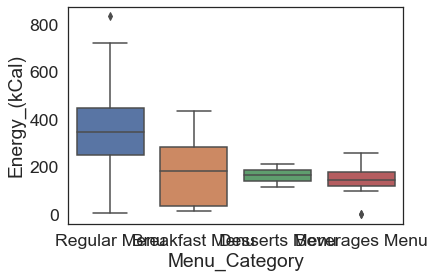

In [16]:
from tkinter import DoubleVar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
dados = pd.read_csv('India_Menu.csv')
dados.columns = [c.replace(' ', '_') for c in dados.columns]
dados = dados.query('Menu_Category == "Beverages Menu" or Menu_Category == "Breakfast Menu" or Menu_Category == "Desserts Menu" or Menu_Category == "Regular Menu"')
dados = dados[['Menu_Category','Per_Serve_Size','Energy_(kCal)','Protein_(g)','Total_fat_(g)','Total_carbohydrate_(g)']]
sns.boxplot(x = dados['Menu_Category'], y = dados['Energy_(kCal)'], data= dados)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

(0.0, 127.5174008757826)

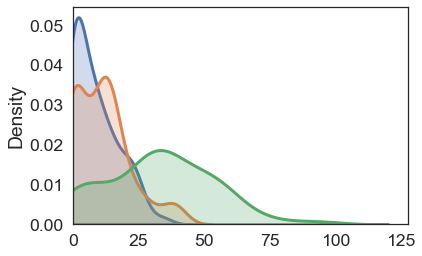

In [13]:
from cProfile import label
from tkinter import DoubleVar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
dados['Per_Serve_Size'] =  dados['Per_Serve_Size'].str.extract('(\d+)').astype(float)
sns.distplot(x = dados['Protein_(g)'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(x = dados['Total_fat_(g)'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(x = dados['Total_carbohydrate_(g)'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.xlim(xmin=0)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

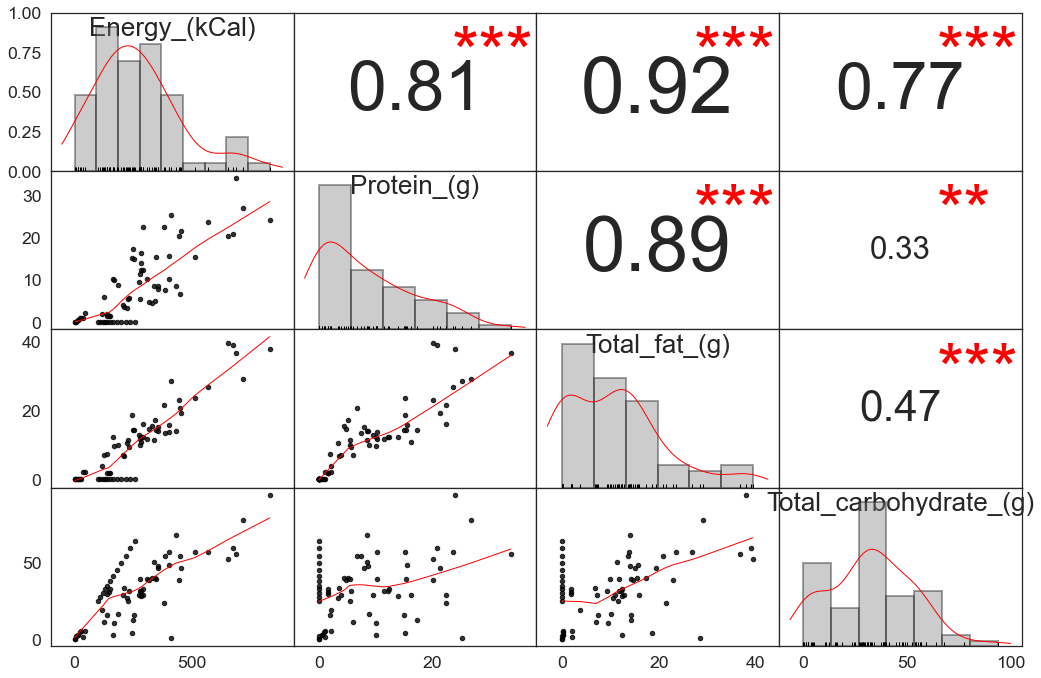

In [17]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 80 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=70)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(dados[['Energy_(kCal)','Protein_(g)','Total_fat_(g)','Total_carbohydrate_(g)']], aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.distplot, color='black',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)

# Remove axis labels
for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')

# Add titles to the diagonal axes/subplots
for ax, col in zip(np.diag(g.axes), dados[['Energy_(kCal)','Protein_(g)','Total_fat_(g)','Total_carbohydrate_(g)']].columns):
    ax.set_title(col, y=0.82, fontsize=26)